# House Price Prediction - 04 - Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [2]:
sns.set(rc={"figure.figsize":(16, 9)})

In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Modelling 

In [6]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
           'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train.SalePrice, test_size = 0.25, random_state = 0)

In [8]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train: (1095, 10)
X_test: (365, 10)
y_train: (1095,)
y_test : (365,)


In [9]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

In [11]:
print('Coefficients: \n', model_lr.coef_)

Coefficients: 
 [ 1.75742334e+04  5.81931025e+01  2.03929348e+03  4.05333995e+01
  3.08379287e+01  1.19694437e+01 -8.38956913e+03 -1.91486699e+02
  2.94528857e+02  3.19795121e+02]


In [12]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred))

Mean squared error: 2130448428.11


#### The coefficient of determination: 1 is perfect prediction

The coefficient of determination tells you what proportion of the variance in your predicted variables can be explained by the predictors.

If your determination coefficient is 1, your predictors perfectly predict your dependent variables. If it is 0, your predictors tell you nothing about the value of the dependent variable.

taken from: https://programmathically.com/the-coefficient-of-determination-and-linear-regression-assumptions/

In [13]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.68


#### Prediction Plots

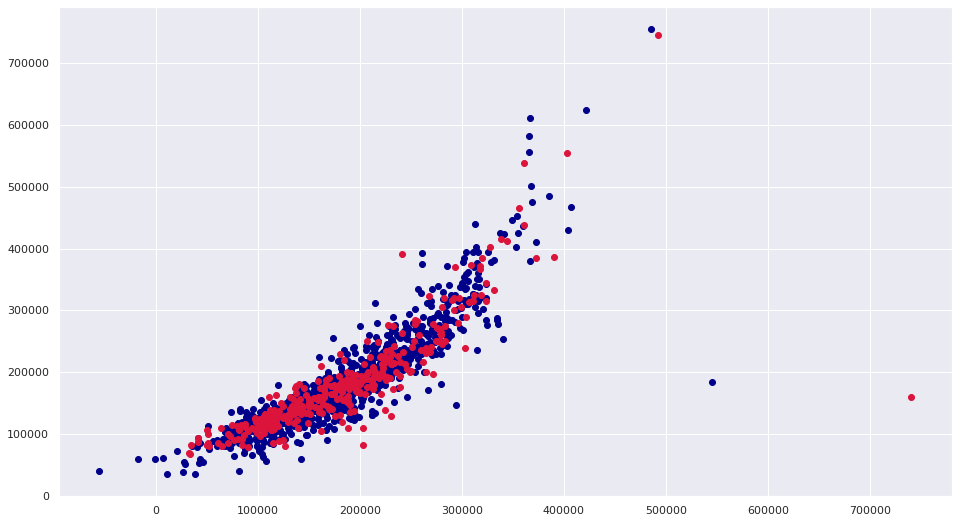

In [14]:
plt.scatter(y_train_pred, y_train, color="darkblue")
plt.scatter(y_test_pred, y_test, color="crimson")